In [51]:
import pandas as pd
df = pd.read_csv("araba_veri.csv")
df.rename(columns={"name": "Isim",
                  "year": "Yil",
                  "selling_price":"Fiyat",
                  "km_driven":"Km",
                  "fuel":"Yakit",
                  "transmission":"Vites"}, inplace= True)
df.head()

,Isim,Yil,Fiyat,Km,Yakit,seller_type,Vites,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Analiz tavanı 1950000.0 USD olarak alınmıştır.


Text(0, 0.5, 'Fiyat')

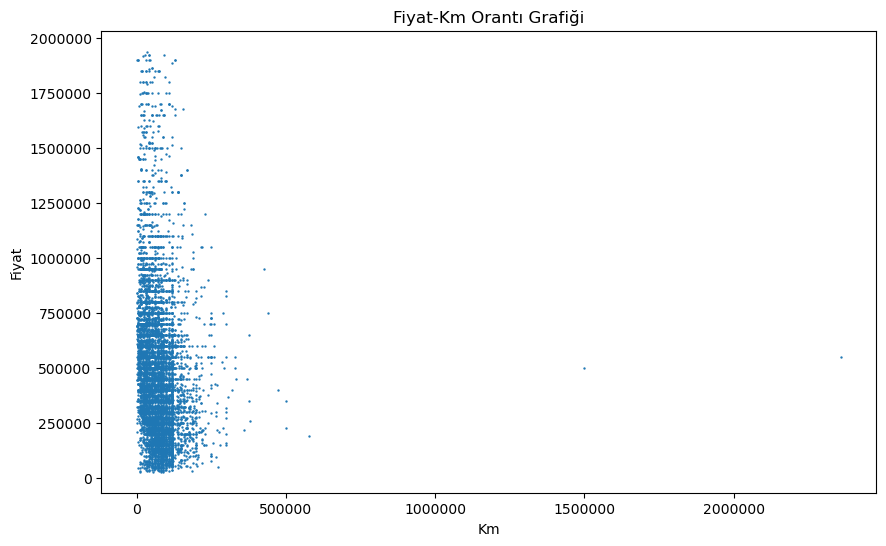

In [52]:
ust_sinir=df["Fiyat"].quantile(0.95)
print(f"Analiz tavanı {ust_sinir} USD olarak alınmıştır.")
df_temiz = df[df["Fiyat"]<ust_sinir]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df_temiz['Km'],df_temiz['Fiyat'],s=0.5)
plt.ticklabel_format(style='plain')
plt.title("Fiyat-Km Orantı Grafiği")
plt.xlabel("Km")
plt.ylabel("Fiyat")

          Fiyat        Km       Yil
Fiyat  1.000000 -0.182590  0.579659
Km    -0.182590  1.000000 -0.394433
Yil    0.579659 -0.394433  1.000000


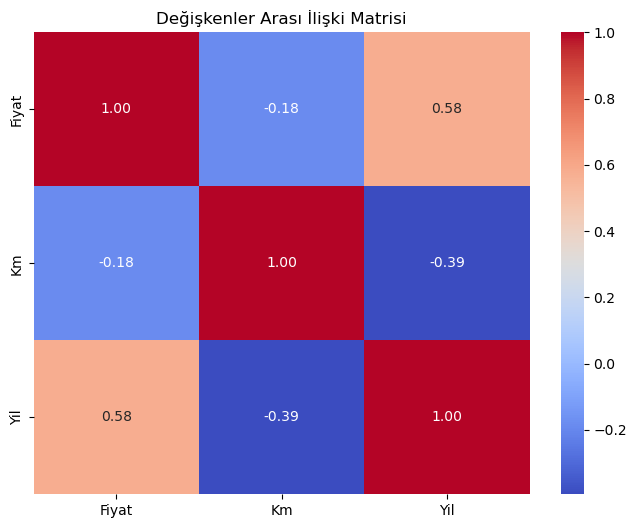

In [53]:
sayisal_veri = df_temiz[["Fiyat","Km","Yil"]]
korelasyon = sayisal_veri.corr()
print(korelasyon)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(korelasyon,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası İlişki Matrisi")
plt.show()

In [54]:
print(df["Vites"].unique())
print(df["Yakit"].unique())

['Manual' 'Automatic']
['Diesel' 'Petrol' 'LPG' 'CNG']


In [55]:
vites_sozluk={"Manual":"1",
             "Automatic":"2"}
yakit_sozluk={"Diesel":"1",
             "Petrol":"2",
             "LPG":"3",
             "CNG":"4"}

df["Yakit_kod"] = df["Yakit"].map(yakit_sozluk)
df["Vites_kod"] = df["Vites"].map(vites_sozluk)
df.head()

,Isim,Yil,Fiyat,Km,Yakit,seller_type,Vites,owner,mileage,engine,max_power,torque,seats,Yakit_kod,Vites_kod
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,1,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,1,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,2,1
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,1,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,2,1


              Fiyat        Km       Yil  Yakit_kod  Vites_kod
Fiyat      1.000000 -0.225534  0.414092  -0.202916   0.588845
Km        -0.225534  1.000000 -0.418006  -0.239728  -0.201229
Yil        0.414092 -0.418006  1.000000  -0.051355   0.244707
Yakit_kod -0.202916 -0.239728 -0.051355   1.000000   0.010049
Vites_kod  0.588845 -0.201229  0.244707   0.010049   1.000000


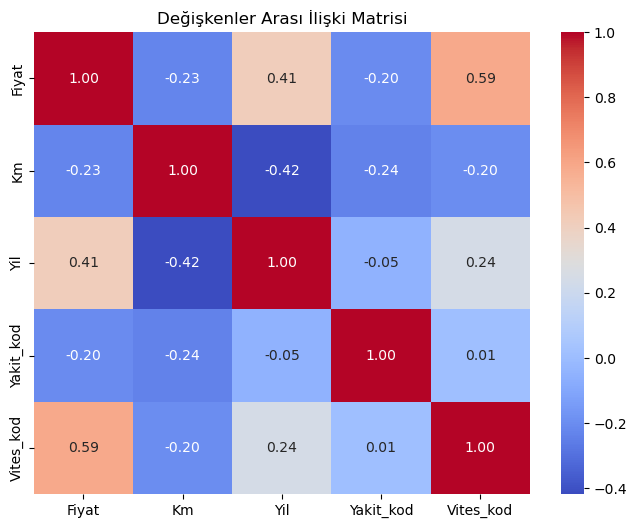

In [57]:
sayisal_veri = df[["Fiyat","Km","Yil","Yakit_kod","Vites_kod"]]
korelasyon = sayisal_veri.corr()
print(korelasyon)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(korelasyon,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası İlişki Matrisi")
plt.show()

In [60]:
y=df["Fiyat"]
x=df[["Yil","Vites_kod","Yakit_kod","Km"]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (6502, 4)
Test seti boyutu: (1626, 4)


In [64]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Modelin sabit sayısı",lm.intercept_)

Modelin sabit sayısı -100652323.8251146


In [66]:
tahminler = lm.predict(X_test)
skor = lm.score(X_test,y_test)
print(f"Modelin skoru (R^2):{skor*100:.2f}")

Modelin skoru (R^2):45.48


In [130]:
df['Marka'] = df['Isim'].str.split().str[0]
df['Model'] = df['Isim'].str.split(n=1).str[1]

tum_markalar = df["Marka"].unique()
marka_sozluk = {marka: index for index,marka in enumerate(tum_markalar)}

df["Marka_kod"] = df["Marka"].map(marka_sozluk)
print(df["Marka"].unique())

tum_modeller = df["Model"].unique()
model_sozluk = {model: index for index,model in enumerate(tum_modeller)}

df["Model_kod"] = df["Model"].map(model_sozluk)
print(df["Model"].unique())

['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
['Swift Dzire VDI' 'Rapid 1.5 TDI Ambition' 'City 2017-2020 EXi' ...
 'Nexon 1.5 Revotorq XT' 'Freestyle Titanium Plus Diesel BSIV'
 'Innova 2.5 GX (Diesel) 8 Seater BS IV']


In [126]:
marka_puanlari = {
    # 1. Lig: Ekonomik / Giriş Seviyesi
    'Maruti': 1, 'Datsun': 1, 'Tata': 1, 'Ambassador': 1, 
    'Ashok': 1, 'Force': 1, 'Daewoo': 1, 'Chevrolet': 1, 'Fiat': 1, 'Opel': 1,

    # 2. Lig: Orta Segment 
    'Hyundai': 2, 'Renault': 2, 'Honda': 2, 'Nissan': 2, 
    'Mitsubishi': 2, 'Peugeot': 2, 'Mahindra': 2, 'Isuzu': 2, 'Skoda': 2,

    # 3. Lig: Üst Segment / Yarı Premium 
    'Ford': 3, 'Volkswagen': 3, 'Toyota': 3, 'Kia': 3, 
    'MG': 3, 'Jeep': 3,

    # 4. Lig: Lüks / Premium 
    'Mercedes-Benz': 4, 'BMW': 4, 'Audi': 4, 'Volvo': 4, 
    'Jaguar': 4, 'Land': 4, 'Lexus': 4 
}

df["Klasman"] = df["Marka"].map(marka_puanlari)
print(df[["Klasman","Marka"]].head(10))

   Klasman    Marka
0        1   Maruti
1        2    Skoda
2        2    Honda
3        2  Hyundai
4        1   Maruti
5        2  Hyundai
6        1   Maruti
7        1   Maruti
8        3   Toyota
9        3     Ford


              Fiyat        Km       Yil  Yakit_kod  Vites_kod   Klasman  \
Fiyat      1.000000 -0.225534  0.414092  -0.202916   0.588845  0.583025   
Km        -0.225534  1.000000 -0.418006  -0.239728  -0.201229 -0.023589   
Yil        0.414092 -0.418006  1.000000  -0.051355   0.244707  0.150068   
Yakit_kod -0.202916 -0.239728 -0.051355   1.000000   0.010049 -0.224531   
Vites_kod  0.588845 -0.201229  0.244707   0.010049   1.000000  0.407304   
Klasman    0.583025 -0.023589  0.150068  -0.224531   0.407304  1.000000   
Marka_kod  0.501616 -0.030966  0.115350  -0.293155   0.338396  0.559915   

           Marka_kod  
Fiyat       0.501616  
Km         -0.030966  
Yil         0.115350  
Yakit_kod  -0.293155  
Vites_kod   0.338396  
Klasman     0.559915  
Marka_kod   1.000000  


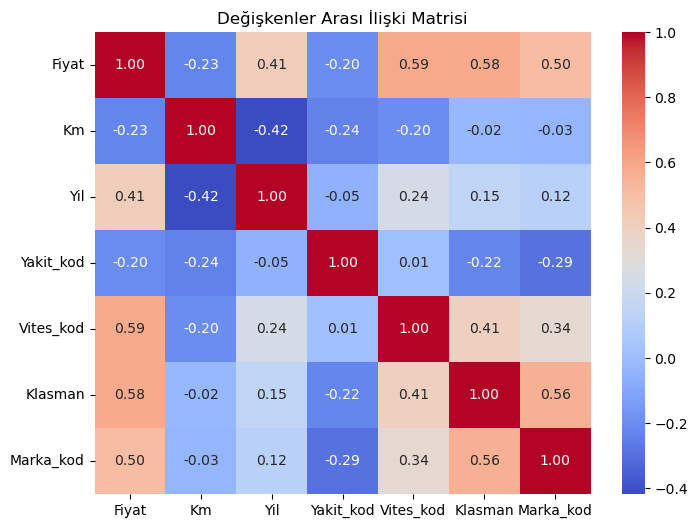

In [134]:
sayisal_veri = df[["Fiyat","Km","Yil","Yakit_kod","Vites_kod","Klasman","Marka_kod"]]
korelasyon = sayisal_veri.corr()
print(korelasyon)

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(korelasyon,annot=True,cmap='coolwarm', fmt=".2f")
plt.title("Değişkenler Arası İlişki Matrisi")
plt.show()

In [136]:
y=df["Fiyat"]
x=df[["Yil","Vites_kod","Yakit_kod","Km","Klasman","Marka_kod"]]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
print("Eğitim seti boyutu:", X_train.shape)
print("Test seti boyutu:", X_test.shape)

Eğitim seti boyutu: (6502, 6)
Test seti boyutu: (1626, 6)


In [138]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Modelin sabit sayısı",lm.intercept_)

Modelin sabit sayısı -94146207.89991833


In [140]:
tahminler = lm.predict(X_test)
skor = lm.score(X_test,y_test)
print(f"Modelin skoru (R^2):{skor*100:.2f}")

Modelin skoru (R^2):59.12
